You have a 2-D grid of size m x n representing a box, and you have n balls. The box is open on the top and bottom sides.

Each cell in the box has a diagonal board spanning two corners of the cell that can redirect a ball to the right or to the left.

    A board that redirects the ball to the right spans the top-left corner to the bottom-right corner and is represented in the grid as 1.
    A board that redirects the ball to the left spans the top-right corner to the bottom-left corner and is represented in the grid as -1.

We drop one ball at the top of each column of the box. Each ball can get stuck in the box or fall out of the bottom. A ball gets stuck if it hits a "V" shaped pattern between two boards or if a board redirects the ball into either wall of the box.

Return an array answer of size n where answer[i] is the column that the ball falls out of at the bottom after dropping the ball from the ith column at the top, or -1 if the ball gets stuck in the box.

 

Example 1:

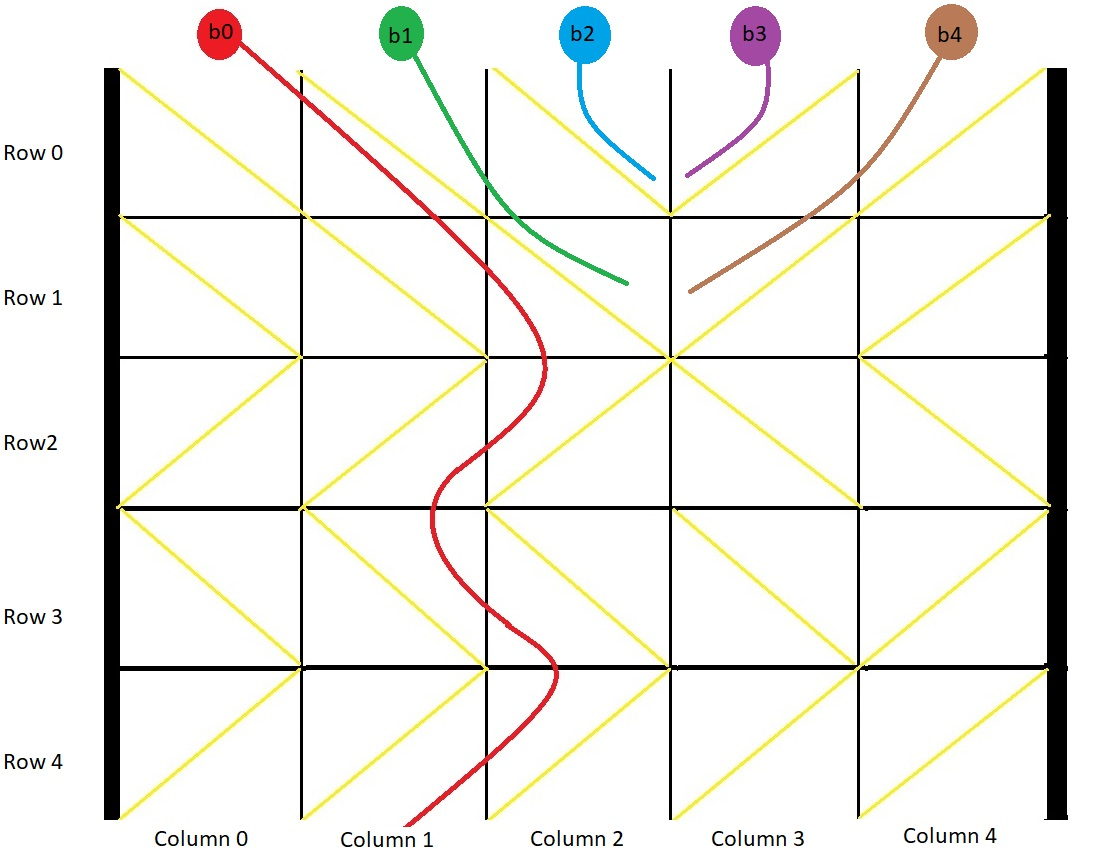

Input: grid = [[1,1,1,-1,-1],[1,1,1,-1,-1],[-1,-1,-1,1,1],[1,1,1,1,-1],[-1,-1,-1,-1,-1]]
Output: [1,-1,-1,-1,-1]
Explanation: This example is shown in the photo.
Ball b0 is dropped at column 0 and falls out of the box at column 1.
Ball b1 is dropped at column 1 and will get stuck in the box between column 2 and 3 and row 1.
Ball b2 is dropped at column 2 and will get stuck on the box between column 2 and 3 and row 0.
Ball b3 is dropped at column 3 and will get stuck on the box between column 2 and 3 and row 0.
Ball b4 is dropped at column 4 and will get stuck on the box between column 2 and 3 and row 1.

Example 2:

Input: grid = [[-1]]
Output: [-1]
Explanation: The ball gets stuck against the left wall.

Example 3:

Input: grid = [[1,1,1,1,1,1],[-1,-1,-1,-1,-1,-1],[1,1,1,1,1,1],[-1,-1,-1,-1,-1,-1]]
Output: [0,1,2,3,4,-1]

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 100
    grid[i][j] is 1 or -1.



In [2]:
from typing import List


class Solution:
    def findBall(self, grid: List[List[int]]) -> List[int]:
        width = len(grid[0])
        ans = [-1 for _ in range(width)]
        if len(grid[0]) <= 1:
            return [-1]
        
        for ball in range(width):
            pos = ball
            for row in range(len(grid)):
                if grid[row][pos] == 1:
                    if pos + 1 < width and grid[row][pos + 1] == 1:
                        pos += 1
                    else:
                        pos = -1
                        break
                        
                if grid[row][pos] == -1:
                    if pos - 1 >= 0 and grid[row][pos - 1] == -1:
                        pos -= 1
                    else:
                        pos = -1
                        break
            ans[ball] = pos
            
        return ans

In [3]:
s = Solution()
s.findBall([[1,1,1,-1,-1],[1,1,1,-1,-1],[-1,-1,-1,1,1],[1,1,1,1,-1],[-1,-1,-1,-1,-1]])

[1, -1, -1, -1, -1]

In [4]:
s.findBall([[-1]])

[-1]

In [5]:
s.findBall([[1,1,1,1,1,1],[-1,-1,-1,-1,-1,-1],[1,1,1,1,1,1],[-1,-1,-1,-1,-1,-1]])

[0, 1, 2, 3, 4, -1]